In [46]:
import datetime
import pandas as pd
import seaborn as sns
import numpy.random as npr
from sdv.tabular import CTGAN, GaussianCopula, CopulaGAN
from sdv.evaluation import evaluate

DATASET_PATH = "data.csv"
USER_COLUMNS = ["gender", "occupation", "age"]
MOVIE_COLUMNS = [*[f"tag{n}" for n in range(18)]]
SEED = 2021
npr.seed(SEED)

In [47]:
%%time
df = pd.read_csv(DATASET_PATH)
df = df[USER_COLUMNS + MOVIE_COLUMNS].drop_duplicates()
df

<string>:2: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.


CPU times: user 3.27 s, sys: 545 ms, total: 3.81 s
Wall time: 4.17 s


,gender,occupation,age,tag0,tag1,tag2,tag3,tag4,tag5,tag6,...,tag8,tag9,tag10,tag11,tag12,tag13,tag14,tag15,tag16,tag17
0,F,10,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,F,10,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,F,10,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,F,10,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5,F,10,1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999739,F,20,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
999762,M,7,56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
999763,M,7,56,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
999978,F,10,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# Performance comparison varying row number

In [48]:
def compare_performance_varying_rows(df, models, sample_sizes):
    results = []
    for model_name, model in models.items():
        for sample_size in sample_sizes:
            data = df.sample(sample_size)
            start = datetime.datetime.utcnow()
            model.fit(data)
            duration = datetime.datetime.utcnow() - start
            results.append({
                "model": model_name,
                "duration": duration,
                "rows": data.shape[0],
                "cols": data.shape[1]
            })
    return pd.DataFrame(results)



In [29]:
%%time
npr.seed(SEED)

perf_results = compare_performance_varying_rows(
    df, 
    models={
        "CTGAN": CTGAN(epochs=1, verbose=True),
        "CopulaGAN": CopulaGAN(epochs=1, verbose=True),
        "GaussianCopula": GaussianCopula(),
    },
    sample_sizes=range(500, 6000, 500)
)


/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_


Epoch 1, Loss G:  0.8263,Loss D: -0.0216


/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_


Epoch 1, Loss G:  0.7978,Loss D:  0.0281


/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: Conv

Epoch 1, Loss G:  0.7140,Loss D:  0.0396


/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: Conv

Epoch 1, Loss G:  0.7816,Loss D:  0.0035


/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: Conv

Epoch 1, Loss G:  0.6907,Loss D: -0.0153


/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: Conv

Epoch 1, Loss G:  0.6924,Loss D: -0.0031


/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: Conv

Epoch 1, Loss G:  0.5088,Loss D:  0.0163


/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: Conv

Epoch 1, Loss G:  0.5716,Loss D:  0.0515


/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: Conv

Epoch 1, Loss G:  0.6047,Loss D:  0.0420


/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: Conv

Epoch 1, Loss G:  0.5857,Loss D:  0.0061


/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: Conv

Epoch 1, Loss G:  0.7563,Loss D:  0.0275


/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:4798: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", F

Epoch 1, Loss G:  0.7103,Loss D:  0.0082


/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:4798: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/User

Epoch 1, Loss G:  0.8463,Loss D:  0.0103


/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:4798: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/User

Epoch 1, Loss G:  0.7667,Loss D: -0.0235


/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:4798: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/copulas/univariate/truncated_gaussian.py:43: RuntimeWarning: invalid value encountered in double_scalars
  a = (self.min - loc) / scale
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/copulas/univariate/truncated_gaussian.py:44: RuntimeWarning: divide by zero encountered in double_scalars
  b = (self.max - loc) / scale
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From v

Epoch 1, Loss G:  0.6997,Loss D: -0.0025


/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:4798: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/User

Epoch 1, Loss G:  0.7663,Loss D:  0.0366


/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:4798: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/User

Epoch 1, Loss G:  0.6978,Loss D:  0.0169


/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:4798: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/User

Epoch 1, Loss G:  0.6239,Loss D: -0.0265


/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:4798: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/User

Epoch 1, Loss G:  0.6551,Loss D: -0.0428


/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:4798: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/User

Epoch 1, Loss G:  0.6547,Loss D:  0.0291


/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:4798: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/User

Epoch 1, Loss G:  0.6264,Loss D: -0.0049


/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:4798: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/User

Epoch 1, Loss G:  0.6380,Loss D:  0.0574


/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:4798: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


CPU times: user 3min 9s, sys: 5.39 s, total: 3min 15s
Wall time: 3min 38s


In [34]:
perf_results["duration"] = perf_results["duration"].map(lambda x: x.seconds)
perf_results.head()

,model,duration,rows,cols
0,CTGAN,0,500,3
1,CTGAN,1,1000,3
2,CTGAN,1,1500,3
3,CTGAN,1,2000,3
4,CTGAN,1,2500,3


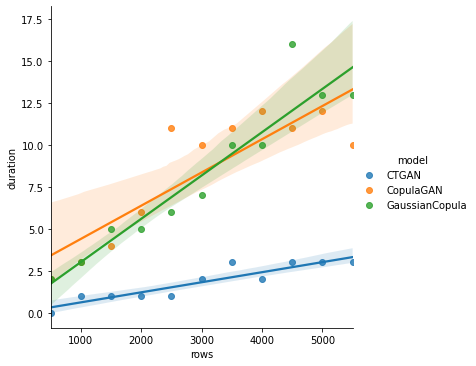

In [33]:
sns.lmplot(data=perf_results, x="rows", y="duration", hue="model")

# Performance comparison varying column number

In [38]:
def compare_performance_varying_cols(df, models, max_cols=None):
    results = []
    max_cols = max_cols or df.shape[1]
    for model_name, model in models.items():
        for n_cols in range(1, max_cols):
            data = df[df.columns[:n_cols]]
            start = datetime.datetime.utcnow()
            model.fit(data)
            duration = datetime.datetime.utcnow() - start
            results.append({
                "model": model_name,
                "duration": duration,
                "rows": data.shape[0],
                "cols": data.shape[1]
            })
    return pd.DataFrame(results)

In [49]:
%%time
npr.seed(SEED)
perf_results_2 = compare_performance_varying_cols(
    df, 
    models={
        "CTGAN": CTGAN(epochs=1, verbose=True),
        "CopulaGAN": CopulaGAN(epochs=1, verbose=True),
        "GaussianCopula": GaussianCopula(),
    }
)

Epoch 1, Loss G:  0.1060,Loss D:  0.0690
Epoch 1, Loss G: -0.1502,Loss D: -0.2145
Epoch 1, Loss G:  0.0904,Loss D: -0.0393
Epoch 1, Loss G:  0.5185,Loss D:  0.2087
Epoch 1, Loss G:  1.2324,Loss D:  0.0229
Epoch 1, Loss G:  0.9168,Loss D:  0.0034
Epoch 1, Loss G: -0.8701,Loss D: -0.0852
Epoch 1, Loss G:  0.5857,Loss D:  0.0391
Epoch 1, Loss G:  0.1485,Loss D:  0.1637
Epoch 1, Loss G:  0.6271,Loss D: -0.0421
Epoch 1, Loss G: -0.3971,Loss D:  0.3069
Epoch 1, Loss G:  1.0115,Loss D: -0.2227
Epoch 1, Loss G:  0.6698,Loss D: -0.0428
Epoch 1, Loss G: -0.2509,Loss D:  0.0164
Epoch 1, Loss G:  0.5620,Loss D:  0.0397
Epoch 1, Loss G:  0.0911,Loss D:  0.0714
Epoch 1, Loss G:  1.3677,Loss D: -0.0839
Epoch 1, Loss G:  0.6211,Loss D: -0.0117
Epoch 1, Loss G:  0.9689,Loss D: -0.0682
Epoch 1, Loss G: -0.2416,Loss D: -0.0236
Epoch 1, Loss G: -0.1621,Loss D:  0.1828
Epoch 1, Loss G:  0.1061,Loss D:  0.0212
Epoch 1, Loss G:  0.7443,Loss D: -0.0136
Epoch 1, Loss G:  0.6067,Loss D:  0.0182
Epoch 1, Loss G:

/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/optimize/optimize.py:597: RuntimeWarning: invalid value encountered in subtract
  numpy.max(numpy.abs(fsim[0] - fsim[1:])) <= fatol):
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:4798: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/Users/vldpro/Workspace/university/recsys/.venv/lib/python3.7/site-packages/scipy/sta

CPU times: user 10min 1s, sys: 18.2 s, total: 10min 20s
Wall time: 12min 20s


In [50]:
perf_results_2["duration"] = perf_results_2["duration"].map(lambda x: x.seconds)
perf_results_2.head()

,model,duration,rows,cols
0,CTGAN,9,45294,1
1,CTGAN,10,45294,2
2,CTGAN,9,45294,3
3,CTGAN,11,45294,4
4,CTGAN,10,45294,5


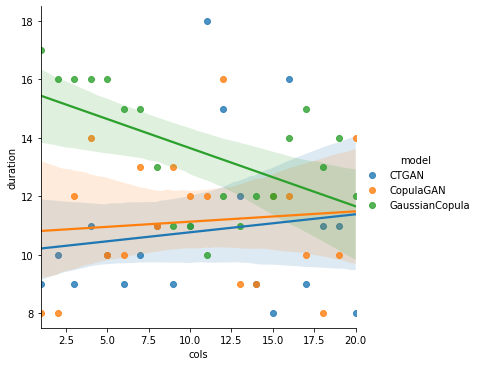

In [51]:
sns.lmplot(data=perf_results_2, x="cols", y="duration", hue="model")